# Simple linear regression & gradient descent with Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Dataset

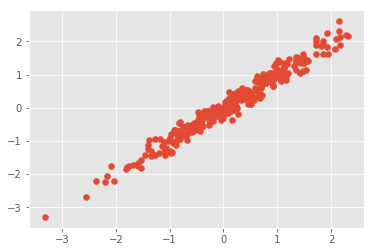

In [5]:
m = 300
x = np.random.normal(0.0,1.0,m)
y = x + np.random.normal(0.0,2.0,m) / 10
plt.scatter(x,y)
plt.show()

### Model

In [6]:
iterations = 20
learning_rate = 1e-1

x_ = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)
m = tf.Variable(tf.random.uniform([1],-1.,1.))
b = tf.Variable(tf.zeros([1]))

yHat = tf.add(tf.multiply(m,x_),b)

cost = tf.reduce_mean(tf.square(yHat - y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train = optimizer.minimize(cost)

### Init. variables and run session

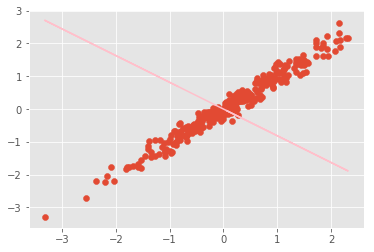

Cost after 0 iterations:  2.0842867
Cost after 5 iterations:  0.27891517
Cost after 10 iterations:  0.064158395
Cost after 15 iterations:  0.036759213
Cost after 19 iterations:  0.033356234


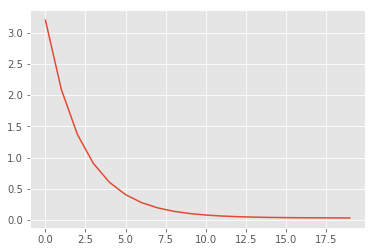

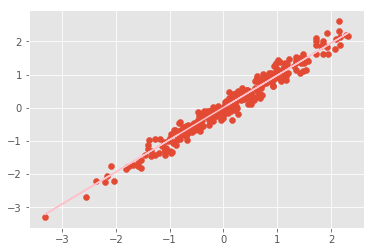

b: [0.0055327] , m: [0.9700462]


In [7]:
cost_history = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    #---Plot f(x)  
    plt.scatter(x,y)
    plt.plot(x,sess.run(yHat, feed_dict = {x_: x,y_: y}),c='pink')
    plt.show()
    #---
    for i in range(iterations):
        cost_history.append(sess.run(cost, feed_dict = {x_: x,y_: y}))
        sess.run(train, feed_dict = {x_: x,y_: y})
        if i % 5 == 0 or i == iterations-1:
            print('Cost after',i,'iterations: ',sess.run(cost, feed_dict = {x_: x,y_: y}))
    #---Plot cost
    plt.plot(np.arange(iterations),cost_history)
    plt.show()
    #---Plot f(x)
    plt.scatter(x,y)
    plt.plot(x,sess.run(yHat, feed_dict = {x_: x,y_: y}),c='pink')
    plt.show()
    #---
    print('b:',sess.run(b),', m:',sess.run(m))